In [223]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)
# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)




Toggle code

In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10.0,7.27)})
sns.set_style("whitegrid")



In [ ]:

instruction = open("student.txt", "r")
for line in instruction:
    print(line)
instruction.close()

In [3]:
# Reading datasets
maths = pd.read_csv("student-mat.csv")
portugal = pd.read_csv("student-por.csv")


<b>Hypothesis 1: </n>
Students in romantic relationships have worse results in education </b>

In [ ]:

sns.set_style('whitegrid')
sns.countplot(data = maths, x = "G3", hue = "romantic", palette=["darkblue","pink"])
sns.despine()
plt.xlabel("Results from final exam", size = 14)
plt.ylabel("Number of students", size = 14)
plt.title("Maths: 'Single' vs 'In Love'", size = 15, x = 0.2, weight= "bold")

Text(0.0, 1.0, 'Distribution Mathematics')

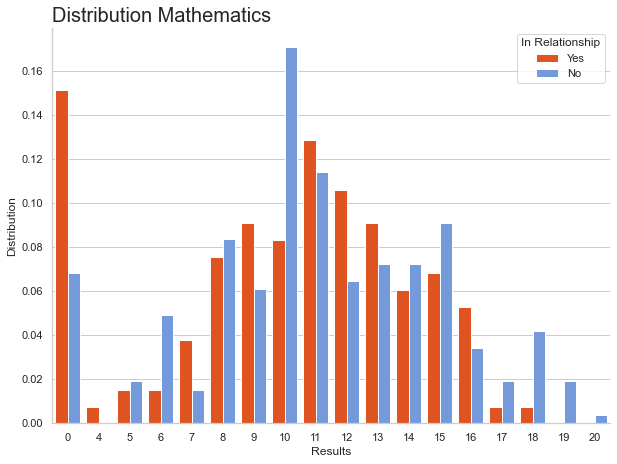

In [133]:
in_love = maths[maths["romantic"] == "yes"][["romantic","G3"]]
single = maths[maths["romantic"] == "no"][["romantic","G3"]]
distribution_in_love = in_love.groupby("G3").count() / len(in_love)
distribution_single = single.groupby("G3").count() / len(single)
combined = pd.merge(distribiution_in_love, distribution_single, how = "outer", on = "G3",suffixes=('_love', '_single'))
combined = combined.rename(columns = {"romantic_love": "Yes", "romantic_single": "No"})
combined = combined.fillna(0)
combined["Results"] = combined.index
melted = combined.melt("Results", var_name = "In Relationship", value_name = "Distribution")
sns.barplot(data = melted, x = "Results", y = "Distribution", hue = "In Relationship", palette= ["orangered", "cornflowerblue"])
sns.despine()
plt.title("Distribution Mathematics", size = 20, loc = "left")

Text(0.0, 1.0, 'Distribution Portugal ')

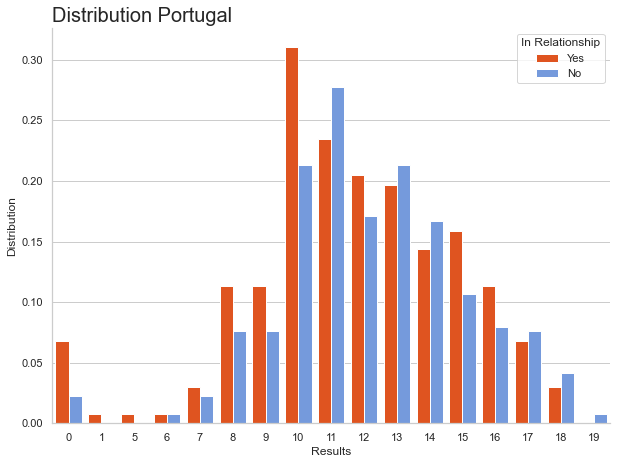

In [137]:
in_love_p = portugal[portugal["romantic"] == "yes"][["romantic","G3"]]
single_p = portugal[portugal["romantic"] == "no"][["romantic","G3"]]
distribution_in_love_p = in_love_p.groupby("G3").count() / len(in_love)
distribution_single_p = single_p.groupby("G3").count() / len(single)
combined_p = pd.merge(distribution_in_love_p, distribution_single_p, how = "outer", on = "G3",suffixes=('_love', '_single'))
combined_p = combined_p.rename(columns = {"romantic_love": "Yes", "romantic_single": "No"})
combined_p = combined_p.fillna(0)
combined_p["Results"] = combined_p.index
melted_p = combined_p.melt("Results", var_name = "In Relationship", value_name = "Distribution")
sns.barplot(data = melted_p, x = "Results", y = "Distribution", hue = "In Relationship", palette= ["orangered", "cornflowerblue"])
sns.despine()
plt.title("Distribution Portugal ", size = 20, loc = "left")

From distribution plots we can see that both in mathematics and portugal language, students who are not in relationships are doing better. Relationships seem to have greater impact on mathematical skills, because the difference between results in both groups is bigger than in portugal language./

<b>Hypothesis 2:
Students with internet access at home have much better results than those without. </b>

Text(0.0, 1.0, 'Distribution ')

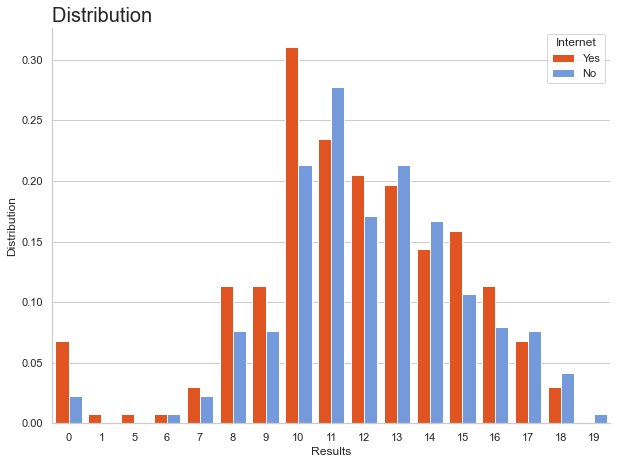

In [144]:
maths_with_internet = maths[maths["internet"] == "yes"][["internet","G3"]]
maths_without_internet = maths[maths["internet"] == "no"][["internet","G3"]]
distribution_with_internet = maths_with_internet.groupby("G3").count() / len(maths_with_internet)
distribution_without_internet = maths_without_internet.groupby("G3").count() / len(maths_without_internet)
combined = pd.merge(distribution_with_internet, distribution_without_internet, how = "outer", on = "G3",suffixes=('_yes', '_no'))
combined = combined.rename(columns = {"internet_yes": "Yes", "internet_no": "No"})
combined = combined.fillna(0)
combined["Results"] = combined.index
melted_p = combined_p.melt("Results", var_name = "Internet", value_name = "Distribution")
sns.barplot(data = melted_p, x = "Results", y = "Distribution", hue = "Internet", palette= ["orangered", "cornflowerblue"])
sns.despine()
plt.title("Distribution maths ", size = 20, loc = "left")

This hypothesis seems not to be true. As we can see from distribution plots, students with access to internet tend to have worse results compared to students who do not have such privilege.

<b>Hypothesis 3:
Students who are from multi-child families (more than 3 kids) have worse results than those from small families. </b>

Text(0.0, 1.0, 'Distribution maths ')

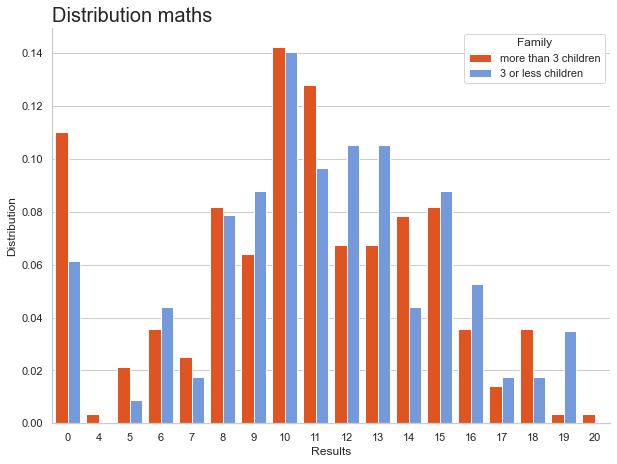

In [148]:
maths_LF = maths[maths["famsize"] == "GT3"][["famsize","G3"]]
maths_SF = maths[maths["famsize"] == "LE3"][["famsize","G3"]]
distribution_large = maths_LF.groupby("G3").count() / len(maths_LF)
distribution_small = maths_SF.groupby("G3").count() / len(maths_SF)
combined_f = pd.merge(distribution_large, distribution_small, how = "outer", on = "G3",suffixes=('_yes', '_no'))
combined_f = combined_f.rename(columns = {"famsize_yes": "more than 3 children", "famsize_no": "3 or less children "})
combined_f = combined_f.fillna(0)
combined_f["Results"] = combined_f.index
melted_f = combined_f.melt("Results", var_name = "Family", value_name = "Distribution")
sns.barplot(data = melted_f, x = "Results", y = "Distribution", hue = "Family", palette= ["seagreen", "lightpink"])
sns.despine()
plt.title("Distribution maths ", size = 20, loc = "left")

We can see that generally students from small families are doing better compared to students from larger ones. 

<b>Hypothesis 4:
Students have better final results in Portugal course compared to Mathematics. </b>

Text(0.0, 1.0, 'Final results distribution: Maths vs Portugal ')

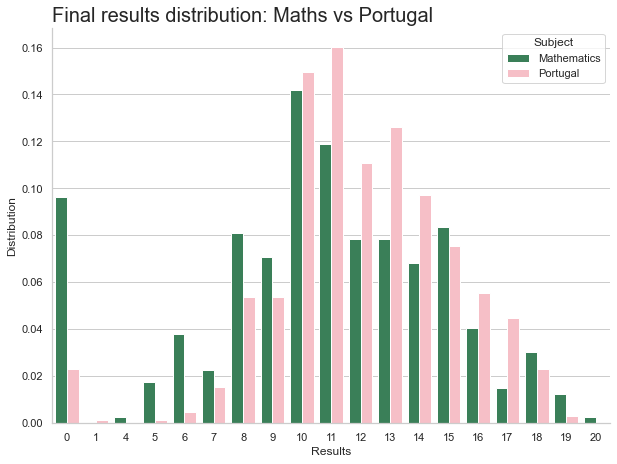

In [168]:
maths_grades = maths[["G3","famsize"]]
portugal_grades = portugal[["G3","famsize"]]
distribution_math_grades = maths_grades.groupby("G3").count() / len(maths_grades)
distribution_portugal_grades = portugal_grades.groupby("G3").count() / len(portugal_grades)
combined_grades = pd.merge(distribution_math_grades,distribution_portugal_grades, how = "outer", on = "G3",suffixes=('_math', '_portugal'))
combined_grades = combined_grades.rename(columns = {"famsize_math": "Mathematics", "famsize_portugal": "Portugal"})
combined_grades = combined_grades.fillna(0)
combined_grades["Results"] = combined_grades.index
melted_grades = combined_grades.melt("Results", var_name = "Subject", value_name = "Distribution")
sns.barplot(data = melted_grades, x = "Results", y = "Distribution", hue = "Subject", palette= ["seagreen", "lightpink"])
sns.despine()
plt.title("Final results distribution: Maths vs Portugal ", size = 20, loc = "left")

From distribution above we can see that results in portugal course are better compared to results in mathematics. However, we we can see that in mathematics course there is greater percentage of outstanding students.
(results  between [18,20]: maths: 4.5%, portugal 2.2 %)

<b> Hypothesis 5: 
There is a correlation between workday alcohol consumption and number of school absences. </b>

Text(0.0, 1.0, 'Average amount of skipped lessons')

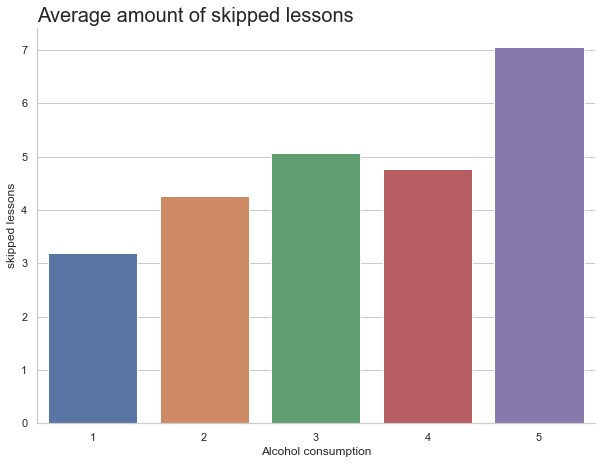

In [221]:

portugal_alcoholic = portugal[["Dalc","absences"]]
how_many = portugal["Dalc"].value_counts()
how_many_hours = portugal_alcoholic.groupby("Dalc").agg({'absences' : 'sum' })
result = how_many_hours["absences"] / how_many
result = result.to_frame()
result = result.reset_index()
result = result.rename(columns = {'index': 'Alcohol consumption', 0 : 'skipped lessons'})
sns.barplot(data = result,x = "Alcohol consumption", y = "skipped lessons")
sns.despine()
plt.title("Average amount of skipped lessons", size =20, loc = "left")

There is such tendency :) 